## Sirius

In [1]:
import pandas as pd
pd_sirius = pd.read_table("SIRIUS/WGCCatAll.dat", delim_whitespace=True, header=0, usecols=[0,1, 2, 3, 6, 7, 10, 11, 14, 15], names=["l", "b", "RAJ2000", "DECJ2000", "J_Mag", "J_Error", "H_Mag", "H_Error", "K_Mag", "K_Error"])
print(len(pd_sirius))
pd_sirius.head()

12227262


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
0,-3.157748,0.190609,17:37:08.331,-31:30:55.55,0.0,0.0,0.000,0.000,15.704,0.088
1,-3.157233,0.192537,17:37:07.951,-31:30:50.26,0.0,0.0,0.000,0.000,15.397,0.064
2,-3.156974,0.189787,17:37:08.643,-31:30:54.79,0.0,0.0,0.000,0.000,15.469,0.104
3,-3.156722,0.189990,17:37:08.633,-31:30:53.63,0.0,0.0,0.000,0.000,15.544,0.106
4,-3.156294,0.191538,17:37:08.330,-31:30:49.34,0.0,0.0,16.667,0.092,0.000,0.000


In [2]:
import pandas as pd
min_l = -0.4
max_l = 0.4
min_b = -0.4
max_b = 0.4
pd_sirius_jsky = pd_sirius.query( '@min_l <= l <= @max_l and @min_b <= b <= @max_b')
print(len(pd_sirius_jsky))

910959


In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
sirius_radec = SkyCoord(ra=pd_sirius_jsky["RAJ2000"], dec=pd_sirius_jsky["DECJ2000"], frame='icrs', unit=(u.hourangle, u.deg))
pd_sirius_jsky["RAJ2000"]=sirius_radec.ra.degree
pd_sirius_jsky["DECJ2000"]=sirius_radec.dec.degree
pd_sirius_jsky.head()

<ipython-input-3-c053be3b4033>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_sirius_jsky["RAJ2000"]=sirius_radec.ra.degree
<ipython-input-3-c053be3b4033>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_sirius_jsky["DECJ2000"]=sirius_radec.dec.degree


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
4972725,-0.399998,-0.394800,266.552696,-29.483206,0.0,0.0,14.325,0.051,13.212,0.040
4972726,-0.399998,0.321374,265.852496,-29.109008,0.0,0.0,16.285,0.068,15.312,0.077
4972732,-0.399997,0.211631,265.959458,-29.166583,0.0,0.0,16.735,0.139,15.173,0.092
4972733,-0.399997,-0.252177,266.412842,-29.408975,0.0,0.0,0.000,0.000,14.473,0.048
4972735,-0.399996,0.178093,265.992171,-29.184161,0.0,0.0,15.220,0.039,14.037,0.060


In [ ]:
pd_sirius_jsky.to_csv('sirius_xmatched_v1.csv', index=False, columns=["RAJ2000","DECJ2000"])

## Xmatch Sirius and GAIA EDR3

In [ ]:
from astroquery.xmatch import XMatch
catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
table = XMatch.query(cat1=open("sirius_xmatched_v1.csv"), cat2='vizier:'+catalog, max_distance=1*u.arcsec, colRA1='RAJ2000', colDec1='DECJ2000')
print(len(table))
pd_siriusgaia3_jsky = table.to_pandas()
pd_siriusgaia3_jsky.head()

67549


/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'panstarrs1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'sdssdr13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'skymapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'urat1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,angDist,RAJ2000,DECJ2000,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,...,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr
0,0.310224,266.519846,-29.465772,266.519760,-29.465815,0.023833,0.015347,91.51,4056893827111227136,266.519762,...,0.008440,1.005363,0.091038,20.565983,0.008436,111.8290,2.063,23.8285,15.3547,-0.0239
1,0.143424,266.219325,-29.305758,266.219365,-29.305777,0.002728,0.001536,89.82,4057089604598611712,266.219384,...,0.002928,0.011155,0.006127,17.566818,0.002928,1771.0000,-0.027,2.7276,1.5364,0.0038
2,0.048739,266.281817,-29.339106,266.281806,-29.339096,0.021548,0.003151,57.58,4057088543746175872,266.281806,...,0.013470,NaN,NaN,20.833149,0.013470,87.4353,NaN,18.2677,11.8546,0.9496
3,0.170100,266.190687,-29.290442,266.190662,-29.290400,0.003129,0.001746,88.89,4057089501529798784,266.190665,...,0.003020,0.016265,0.008829,17.757380,0.003020,1485.9200,0.017,3.1285,1.7466,0.0238
4,0.197721,266.302146,-29.349933,266.302158,-29.349987,0.012320,0.007738,92.48,4057085515790965376,266.302146,...,0.004973,0.115869,0.032134,19.891009,0.004919,208.2300,0.048,12.3125,7.7489,-0.0417


In [ ]:
import tqdm
for i in tqdm.tqdm(range(len(pd_siriusgaia3_jsky))):
    ra = pd_siriusgaia3_jsky.loc[i,"RAJ2000"]
    dec = pd_siriusgaia3_jsky.loc[i,"DECJ2000"]
    js = pd_sirius_jsky.query('RAJ2000==@ra and DECJ2000==@dec') 

    pd_siriusgaia3_jsky.loc[i, "l"] = js["l"].values
    pd_siriusgaia3_jsky.loc[i, "b"] = js["b"].values
    pd_siriusgaia3_jsky.loc[i, "J_Mag"] = js["J_Mag"].values
    pd_siriusgaia3_jsky.loc[i, "J_Error"] = js["J_Error"].values
    pd_siriusgaia3_jsky.loc[i, "H_Mag"] = js["H_Mag"].values
    pd_siriusgaia3_jsky.loc[i, "H_Error"] = js["H_Error"].values
    pd_siriusgaia3_jsky.loc[i, "K_Mag"] = js["K_Mag"].values
    pd_siriusgaia3_jsky.loc[i, "K_Error"] = js["K_Error"].values
pd_siriusgaia3_jsky.tail()

100%|██████████| 67549/67549 [05:45<00:00, 195.42it/s]


,angDist,RAJ2000,DECJ2000,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,...,dec_epoch2000_error,ra_dec_epoch2000_corr,l,b,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
67544,0.370468,266.838621,-28.705700,266.838553,-28.705784,0.003110,0.001949,40.35,4057505224295854592,266.838553,...,2.6849,0.4314,0.394288,-0.204904,0.000,0.000,16.261,0.054,15.599,0.093
67545,0.021463,266.960200,-28.770169,266.960199,-28.770175,0.004230,0.002405,71.67,4057500237831399296,266.960199,...,2.6425,0.3347,0.394290,-0.329487,15.847,0.030,15.094,0.021,14.853,0.035
67546,0.212042,266.962571,-28.771417,266.962504,-28.771426,0.014444,0.007571,62.28,4057500242128392832,266.962516,...,9.4902,0.4950,0.394297,-0.331910,0.000,0.000,16.288,0.056,15.304,0.067
67547,0.508481,266.823042,-28.697414,266.823173,-28.697496,0.005555,0.001553,52.02,4057505293014998400,266.823173,...,3.6314,0.8480,0.394297,-0.188923,0.000,0.000,16.947,0.097,0.000,0.000
67548,0.066488,266.613833,-28.585972,266.613854,-28.585974,0.002242,0.001044,73.56,4057522262424341504,266.613852,...,1.1852,0.4156,0.394318,0.025859,14.011,0.016,13.428,0.015,13.146,0.027


In [ ]:
pd_siriusgaia3_jsky["Hw"] = pd_siriusgaia3_jsky["H_Mag"] + 0.75 * (pd_siriusgaia3_jsky["J_Mag"]-pd_siriusgaia3_jsky["H_Mag"]) - 0.027 * (pd_siriusgaia3_jsky["J_Mag"]-pd_siriusgaia3_jsky["H_Mag"]) * (pd_siriusgaia3_jsky["J_Mag"]-pd_siriusgaia3_jsky["H_Mag"])
pd_siriusgaia3_jsky.to_csv('xmatch_sirius_gaiaedr3_v0.csv')
pd_siriusgaia3_jsky.head()

,angDist,RAJ2000,DECJ2000,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,...,ra_dec_epoch2000_corr,l,b,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error,Hw
0,0.310224,266.519846,-29.465772,266.519760,-29.465815,0.023833,0.015347,91.51,4056893827111227136,266.519762,...,-0.0239,-0.399981,-0.361307,0.000,0.000,16.235,0.091,15.600,0.117,-3.057781
1,0.143424,266.219325,-29.305758,266.219365,-29.305777,0.002728,0.001536,89.82,4057089604598611712,266.219384,...,0.0038,-0.399924,-0.054435,15.195,0.025,14.231,0.046,0.000,0.000,14.928909
2,0.048739,266.281817,-29.339106,266.281806,-29.339096,0.021548,0.003151,57.58,4057088543746175872,266.281806,...,0.9496,-0.399916,-0.118314,16.652,0.093,15.834,0.053,15.537,0.113,16.429434
3,0.170100,266.190687,-29.290442,266.190662,-29.290400,0.003129,0.001746,88.89,4057089501529798784,266.190665,...,0.0238,-0.399913,-0.025138,15.510,0.025,15.096,0.032,14.918,0.079,15.401872
4,0.197721,266.302146,-29.349933,266.302158,-29.349987,0.012320,0.007738,92.48,4057085515790965376,266.302146,...,-0.0417,-0.399905,-0.139081,16.650,0.049,16.048,0.057,16.431,0.329,16.489715


In [ ]:
import numpy as np
obj_l_siriusgaia3_jsky_b = np.zeros(0)
obj_b_siriusgaia3_jsky_b = np.zeros(0)
obj_l_siriusgaia3_jsky_t = np.zeros(0)
obj_b_siriusgaia3_jsky_t = np.zeros(0)
for i in pd_siriusgaia3_jsky.index:
    if pd_siriusgaia3_jsky.loc[i,"Hw"] < 9.5 and pd_siriusgaia3_jsky.loc[i,"Hw"] > 6:
        obj_l_siriusgaia3_jsky_b = np.append(obj_l_siriusgaia3_jsky_b, pd_siriusgaia3_jsky.loc[i,"l"]) 
        obj_b_siriusgaia3_jsky_b = np.append(obj_b_siriusgaia3_jsky_b, pd_siriusgaia3_jsky.loc[i,"b"]) 

    if pd_siriusgaia3_jsky.loc[i,"Hw"] < 15.0 and pd_siriusgaia3_jsky.loc[i,"Hw"] >= 9.5:
        obj_l_siriusgaia3_jsky_t = np.append(obj_l_siriusgaia3_jsky_t, pd_siriusgaia3_jsky.loc[i,"l"]) 
        obj_b_siriusgaia3_jsky_t = np.append(obj_b_siriusgaia3_jsky_t, pd_siriusgaia3_jsky.loc[i,"b"]) 

print(len(obj_l_siriusgaia3_jsky_b))
print(len(obj_l_siriusgaia3_jsky_t))

8
18041


## GAIA

In [ ]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 1.0

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
105697


/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'URAT1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,...,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
0,266.606063,0.1544,-29.432523,0.1203,4056894063330457216,0.3854,0.1816,3.439,2.626,0.182,...,NaN,163634261.0,NaN,15.689690,0.003487,9978.599609,266.606050,-29.432513,359.667456,-0.408159
1,266.601390,0.3691,-29.435182,0.2985,4056894067627124992,1.0752,0.4122,2.069,-2.035,0.466,...,NaN,NaN,NaN,19.369430,0.004099,336.649994,266.601400,-29.435180,359.663069,-0.406063
2,266.606234,4.9979,-29.432917,3.7015,4056894067634459264,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.117722,0.007567,168.990005,266.606234,-29.432917,359.667197,-0.408492
3,266.584478,0.1252,-29.435011,0.1026,4056894097690194816,0.6941,0.1361,5.972,-1.320,0.163,...,NaN,163634133.0,NaN,17.780508,0.002978,1454.599976,266.584485,-29.434985,359.655562,-0.393391
4,266.582015,0.5088,-29.433422,0.3919,4056894097690541952,0.6326,0.5429,1.773,-1.588,0.602,...,NaN,163634132.0,NaN,19.708566,0.004654,246.330002,266.582023,-29.433418,359.655804,-0.390732


In [ ]:
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,...,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
105692,265.976392,0.4061,-28.436340,0.3047,4060566947569146880,-0.5043,0.4080,4.738,-3.848,0.472,...,NaN,164653731.0,NaN,19.529482,0.004196,290.500000,265.976412,-28.436328,0.229683,0.581767
105693,265.976417,0.7603,-28.436906,0.6261,4060566951859829632,0.6889,0.7718,2.326,2.312,1.217,...,NaN,NaN,NaN,20.511147,0.007634,117.620003,265.976406,-28.436907,0.229213,0.581452
105694,265.978361,24.3200,-28.437797,19.6217,4060566951908428032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.041513,0.029465,72.167000,265.978361,-28.437797,0.229349,0.579529
105695,265.979704,0.4600,-28.439167,0.3210,4060566951929495936,-0.2194,0.4869,5.668,-1.693,0.559,...,NaN,164660733.0,NaN,19.643360,0.004757,261.579987,265.979713,-28.439143,0.228802,0.577805
105696,265.936067,0.5258,-28.438485,0.4264,4060567085008065408,0.4228,0.5706,1.882,0.885,0.653,...,NaN,164653653.0,NaN,19.773682,0.004860,231.990005,265.936063,-28.438478,0.209267,0.610839


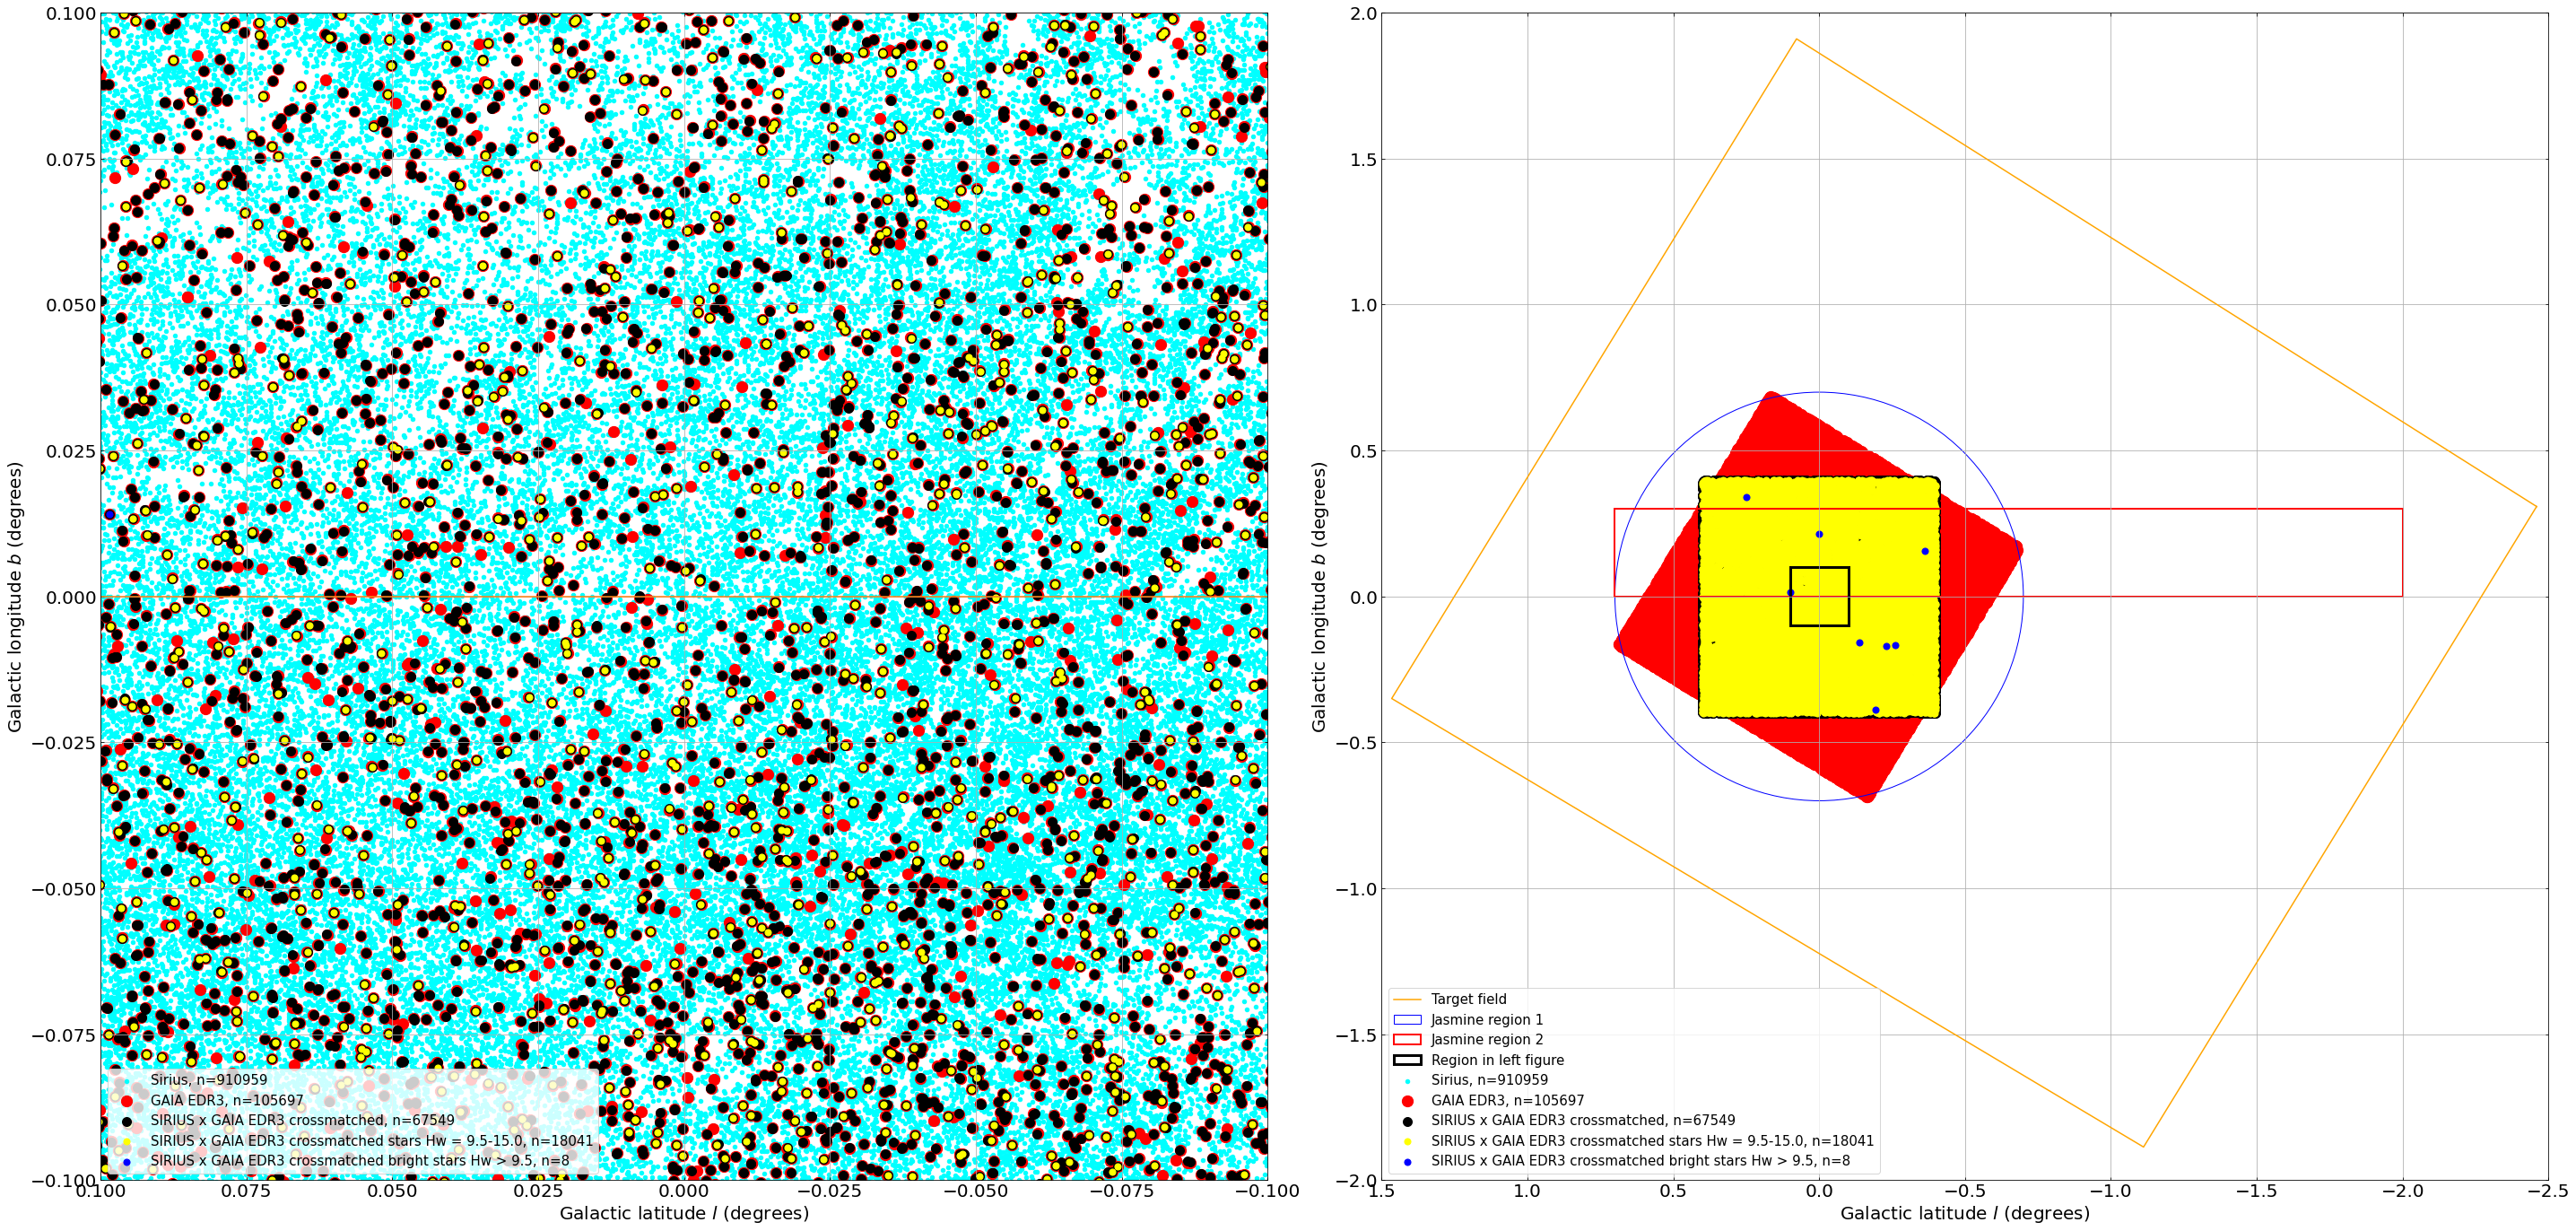

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###

ax1.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=20, c="Cyan", label="Sirius, n="+str(len(pd_sirius_jsky)))
ax1.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax1.scatter(pd_siriusgaia3_jsky["l"], pd_siriusgaia3_jsky["b"], s=100, c="black", label="SIRIUS x GAIA EDR3 crossmatched, n="+str(len(pd_siriusgaia3_jsky)))
ax1.scatter(obj_l_siriusgaia3_jsky_t, obj_b_siriusgaia3_jsky_t, s=50, c="yellow", label="SIRIUS x GAIA EDR3 crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_siriusgaia3_jsky_t)))
ax1.scatter(obj_l_siriusgaia3_jsky_b, obj_b_siriusgaia3_jsky_b, s=50, c="blue", label="SIRIUS x GAIA EDR3 crossmatched bright stars Hw = 6-9.5, n="+str(len(obj_l_siriusgaia3_jsky_b)))

ax2.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=20, c="Cyan", label="Sirius, n="+str(len(pd_sirius_jsky)))
ax2.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax2.scatter(pd_siriusgaia3_jsky["l"], pd_siriusgaia3_jsky["b"], s=100, c="black", label="SIRIUS x GAIA EDR3 crossmatched, n="+str(len(pd_siriusgaia3_jsky)))
ax2.scatter(obj_l_siriusgaia3_jsky_t, obj_b_siriusgaia3_jsky_t, s=50, c="yellow", label="SIRIUS x GAIA EDR3 crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_siriusgaia3_jsky_t)))
ax2.scatter(obj_l_siriusgaia3_jsky_b, obj_b_siriusgaia3_jsky_b, s=50, c="blue", label="SIRIUS x GAIA EDR3 crossmatched bright stars Hw = 6-9.5, n="+str(len(obj_l_siriusgaia3_jsky_b)))

###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb_sirius_gaiaedr3.png")